### __BUSA3020 Group Assignment - Predicting Used Car Sale Prices__

--- 

**Kaggle Competition Ends:** Friday, 31 May 2024 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 31 May 2024 @ 11.59pm (Week 13)  

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle
- The goal is to predict prices of used cars based on car characteristics and regression models

**Instructions:** 

- Form a team of 3 students 
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team on Kaggle [https://www.kaggle.com/t/ff5fb5beaeb14f7686df98fef9d1c0bc](https://www.kaggle.com/t/ff5fb5beaeb14f7686df98fef9d1c0bc)
    - Team leader to click on `team` and join and invite other 2 team members to join
    - Your **team's name must start** with our unit code, for instance you could have a team called BUSA3020_algorithm_arena
- All team members should work on all the tasks however   
    - Each team member will be responsible for one of the 3 tasks listed below    
- **Your predictions must be generated by a model you develop here** 
    - You will receive a mark of **zero** if your code is not able produce the forecasts you submit to Kaggle 

**Competition Rankings**

The rankings for the competition are determined through two different leaderboards:

- **Public Leaderboard Ranking**: Available during the competition, these rankings are calculated based on 50% of the test dataset, which includes 1,500 observations. This allows participants to see how they are performing while the competition is still ongoing.
- **Final Leaderboard Ranking**: These rankings are recalculated from the other 50% of the test dataset, which consists of the remaining 1,500 observations, and are revealed 5 minutes after the competition concludes. This final evaluation determines the ultimate standings of the competition.



**Marks**: 

- Total Marks: 40
- Your individual mark will consist of:  
    - 50% x overall assignment mark + 45% x mark for the task that you are responsible for + 5% x mark received from your teammates for your effort in group work 
- 1 mark: Ranking in the top 5 positions on the **final** leaderboard for your unit 
- 3 marks: Reaching the 1st place in your unit according to the **final** leaderboard ranking


**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
    - Limit of 20 submission per day
2. On iLearn **only team leader to submit** the assignment Jupyter notebook re-named to your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and the group name Kaggle
    - One 15 minute video recording of your work 
        - 5 marks will be deducted from each Task for which there is no video presentation or if you don't follow the above instructions
3. On iLearn each student needs to submit a file with their teammates' names, ID number and a mark for their group effort (out of 100%)
    - You don't need to score yourself

---
---

**Fill out the following information**

- Team Name on Kaggle: `BUSA3020_datanoobs`
- Team Leader and Team Member 1: `Chau Anh Cong`
- Team Member 2: `Tran Tuan Huy Bui`
- Team Member 3: `Thomas Haywood Ruiz`

---
---

**Import Libraries and Dataset**

In [446]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
pd.set_option("display.max_rows", None, "display.max_columns", None, "display.width", None) # pretty printing

df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

---

## Task 1: Problem Description and Initial Data Analysis

1. Based on the Competition Overview, datasets and additional information provided on Kaggle, along with insights gained from personal research of the topic, write **Problem Description** (about 500 words) focusing on the sections listed below: 
- Forecasting Problem - explain what we are trying to do and how it could be used in the real world, e.g. who and how may benefit from it (3 marks)    
- Evaluation Criteria - discuss the criteria that  is used to assess forecasting performance in detail (3 marks)     
- Categorise the variables provided in the dataset according to their type; Hint: similar to what we had in Programming Task 1 (2 marks)  
- Missing Values - only explain what you find for both the training and test datasets at this stage (2 marks)
- Provide and discuss some interesting *univariate* summary statistics and distributions in the training dataset  (2 marks)       
- Other Hints:
    - You should **not** discuss any specific predictive algorithms at this stage
    - Minimise the number of cells you use to enhance presentation and readability

**Total Marks: 12**   

Student in charge of this task: `Thomas Haywood Ruiz`

The primary goal of this project is to develop a model that can accurately predict the prices of listed cars based on certain vehicle features, such as year, horsepower, fuel economy, and power etc. The information collected from this analysis will inform stakeholders of the impact of specific features on car price value. Consumers can leverage the findings to make a more informed decision when buying or selling a vehicle. Car dealerships and online marketplaces can optimise  their pricing strategies based on features that have the most impact on car value. Additionally, insurance companies can utilise this data to determine insurance premiums based on car value.

The evaluation criteria for assessing the performance of the forecast model will be measured on the mean absolute percentage error (MAPE). This error metric will indicate the regression model’s performance by comparing the average percentage difference between the predicted and actual prices. For selecting a suitable model, the MAPE results of different forecast models will be contrasted, and the model with the lowest MAPE score will be utilised for the car value analysis. Although MAPE is a widely utilised metric for forecast evaluation, it is sensitive to outliers which may skew the forecasting evaluation accuracy. Therefore, to ensure the reliability and integrity of the results, this limitation will be carefully considered in the analysis. 

In [451]:
# ADD Count for types, and add Date Type, and Text (torque)

In [453]:
print(df['transmission_display'].value_counts())

transmission_display
Automatic                             3121
Continuously Variable Transmission    1125
6-Speed Automatic                     1065
8-Speed Automatic                      720
9-Speed Automatic                      405
5-Speed Automatic                      120
4-Speed Automatic                      108
7-Speed Automatic                       64
6-Speed Automatic Overdrive             61
6-Speed Manual                          57
Manual                                  33
5-Speed Manual                          11
6-Speed Dual Clutch                     11
7-Speed Dual Clutch                      9
8-Speed Dual Clutch                      6
7-Speed CVT                              4
5-Speed Automatic Overdrive              3
10-Speed Automatic                       2
Name: count, dtype: int64


In [455]:
# print(df['torque'].unique())

In [457]:
df.isnull().sum()

vin                       0
back_legroom              3
body_type                 0
city                      0
city_fuel_economy         0
daysonmarket              0
dealer_zip                0
engine_displacement       0
engine_type               0
exterior_color          110
franchise_dealer         84
front_legroom             3
fuel_tank_volume          3
fuel_type                 0
height                    3
highway_fuel_economy      0
horsepower                0
interior_color          805
is_new                    0
latitude                134
length                    3
listed_date               0
listing_color             0
longitude                 0
make_name                 0
maximum_seating           3
mileage                 282
model_name                0
power                     8
savings_amount          108
seller_rating           100
torque                    0
transmission             75
transmission_display     75
wheel_system              2
wheelbase           

In [459]:
df_test.isnull().sum()

vin                       0
back_legroom             25
body_type                 0
city                      0
city_fuel_economy       349
daysonmarket              0
dealer_zip                0
engine_displacement      27
engine_type              59
exterior_color           45
franchise_dealer         39
front_legroom            25
fuel_tank_volume         25
fuel_type                45
height                   25
highway_fuel_economy    349
horsepower               27
interior_color          379
is_new                    0
latitude                 41
length                   25
listed_date               0
listing_color             0
longitude                 0
make_name                 0
maximum_seating          25
mileage                 149
model_name                0
power                   325
savings_amount           42
seller_rating            29
torque                  365
transmission             59
transmission_display     59
wheel_system              9
wheelbase           

Based on the missing values of both data sets, the test set contains more variables with missing values than the training set. To ensure the reliability of the analysis, these missing values need to be handled appropriately during data preprocessing. 

In [462]:
df.describe()

,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,savings_amount,seller_rating,year,price
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,6866.000000,7000.000000,6718.000000,6892.000000,6900.000000,7000.000000,7000.000000
mean,21.497429,75.878571,50472.137714,2881.928571,28.661714,245.218429,36.957835,-90.594488,31088.643049,551.306152,4.274146,2017.746857,28851.277693
std,4.857918,105.594450,27196.771983,1206.612725,5.658987,87.436127,5.027006,13.826897,44033.494511,929.364379,0.517830,3.608016,17582.731720
min,10.000000,0.000000,1089.000000,1000.000000,13.000000,78.000000,24.571900,-123.205000,0.000000,0.000000,1.000000,1990.000000,650.000000
25%,18.000000,15.000000,30047.000000,2000.000000,24.000000,174.000000,33.484625,-96.951600,6.000000,0.000000,4.000000,2017.000000,17986.500000
50%,21.000000,36.000000,47893.000000,2500.000000,28.000000,243.000000,37.808200,-86.972800,11454.000000,0.000000,4.355556,2019.000000,25387.000000
75%,25.000000,80.000000,76457.000000,3500.000000,33.000000,300.000000,40.925750,-80.704600,43428.250000,834.000000,4.615385,2020.000000,36992.000000
max,70.000000,1259.000000,99362.000000,6800.000000,75.000000,797.000000,48.861600,-67.997400,285788.000000,12596.000000,5.000000,2021.000000,350000.000000


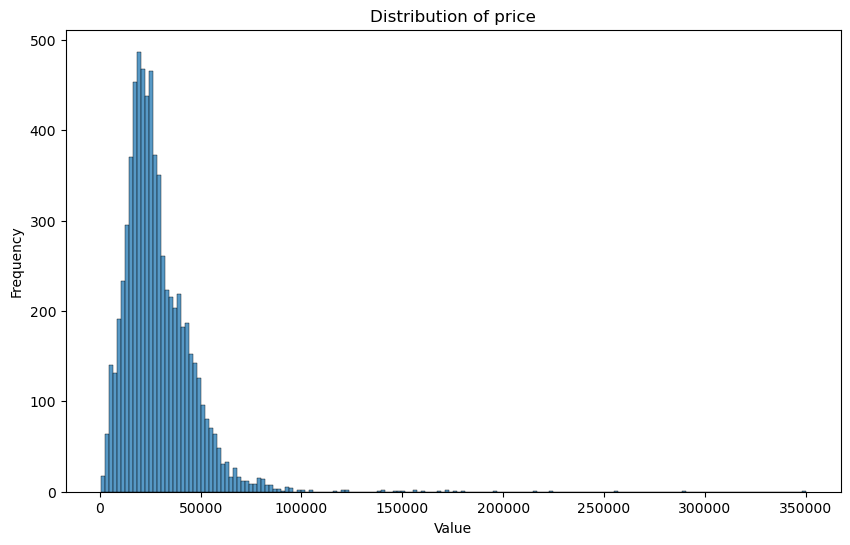

count      7000.000000
mean      28851.277693
std       17582.731720
min         650.000000
25%       17986.500000
50%       25387.000000
75%       36992.000000
max      350000.000000
Name: price, dtype: float64


In [464]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'])
plt.title('Distribution of price')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
print(df['price'].describe())

These statistics on price distribution reflect market trends, product demand, and availibilities of certain vehicles. The average price of listed cars is approximately `$28851` which gives insight into typical range of car prices, so more regular priced vehicles are being advertised due to the higher availability of lower end cars. The 75th percentile is `$36992` which indicates that 75% of listed cars falls below this value, so typically regular priced cars are being listed over higher end; however, the presence of higher outliers reveals that there still are some high-end luxury cars being listed too. 

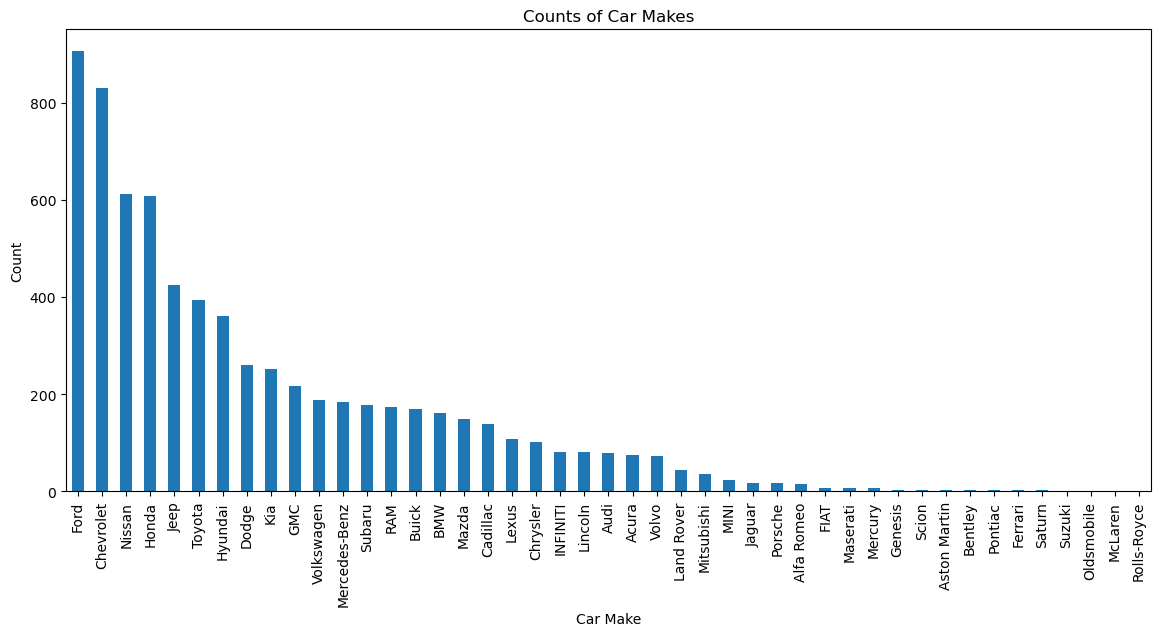

In [466]:
make_counts = df['make_name'].value_counts()

plt.figure(figsize=(14, 6))
make_counts.plot(kind='bar')
plt.title('Counts of Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.show()


In [467]:
df.tail()

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,engine_type,exterior_color,franchise_dealer,front_legroom,fuel_tank_volume,fuel_type,height,highway_fuel_economy,horsepower,interior_color,is_new,latitude,length,listed_date,listing_color,longitude,make_name,maximum_seating,mileage,model_name,power,savings_amount,seller_rating,torque,transmission,transmission_display,wheel_system,wheelbase,width,year,price
6995,1GNERGKWXLJ247912,38.4 in,SUV / Crossover,Georgetown,18.0,41,78626,3600.0,V6,Cajun Red Tintcoat,True,41 in,19.4 gal,Gasoline,70.7 in,27.0,310.0,Dark Atmosphere/Medium Ash Gray,True,30.5767,204.3 in,2020-08-01,RED,-97.6915,Chevrolet,8 seats,3512.0,Traverse,"310 hp @ 6,800 RPM",0.0,4.428571,"266 lb-ft @ 2,800 RPM",A,Automatic,FWD,120.9 in,78.6 in,2020,34435.0
6996,1N4BL4CVXKC206142,35.2 in,Sedan,Marietta,27.0,34,30060,2500.0,I4,Deep Blue Pearl,False,43.8 in,16.2 gal,Gasoline,56.9 in,37.0,188.0,Sport,False,33.9259,192.9 in,2020-08-07,BLUE,-84.5072,Nissan,5 seats,39525.0,Altima,"188 hp @ 6,000 RPM",795.0,3.974522,"180 lb-ft @ 3,600 RPM",CVT,Continuously Variable Transmission,FWD,111.2 in,72.9 in,2019,18377.0
6997,SHHFK7H58JU403724,36 in,Hatchback,North Brunswick,31.0,0,8902,1500.0,I4,Red,True,42.3 in,12.4 gal,Gasoline,56.5 in,40.0,174.0,NaN,False,40.4500,177.9 in,2020-09-10,RED,-74.4935,Honda,5 seats,41889.0,Civic Hatchback,"174 hp @ 6,000 RPM",363.0,4.285714,"162 lb-ft @ 1,700 RPM",CVT,Continuously Variable Transmission,FWD,106.3 in,70.8 in,2018,19995.0
6998,5FNYF6H05MB003346,38.4 in,SUV / Crossover,Ottawa,19.0,60,61350,3500.0,V6,Obsidian Blue Pearl,True,40.9 in,19.5 gal,Gasoline,70.6 in,26.0,280.0,Gray,True,41.3773,196.5 in,2020-07-12,BLUE,-88.8361,Honda,7 seats,2.0,Pilot,"280 hp @ 6,000 RPM",0.0,3.916667,"262 lb-ft @ 4,700 RPM",A,9-Speed Automatic,AWD,111 in,78.6 in,2021,49540.0
6999,1N4AL3AP9HC282910,36.1 in,Sedan,Spring,27.0,44,77386,2500.0,I4,Gun Metallic,True,45 in,18 gal,Gasoline,57.8 in,39.0,182.0,BLACK NV,False,30.1157,191.9 in,2020-07-29,GRAY,-95.4372,Nissan,5 seats,9284.0,Altima,"182 hp @ 6,000 RPM",339.0,4.727273,"180 lb-ft @ 4,000 RPM",A,Automatic,FWD,109.3 in,72 in,2017,18696.0


In [468]:
print(df['year'].value_counts().sort_values())

year
1994       1
1990       1
1992       1
1999       2
1993       2
1998       3
2000       8
2001       8
2003      18
2002      21
2005      28
2006      29
2004      35
2009      45
2008      53
2007      56
2010      75
2011      88
2012     127
2014     150
2013     167
2015     255
2021     297
2016     311
2018     463
2019     726
2017     928
2020    3102
Name: count, dtype: int64


In [469]:
# print(df['year'] == 2021)

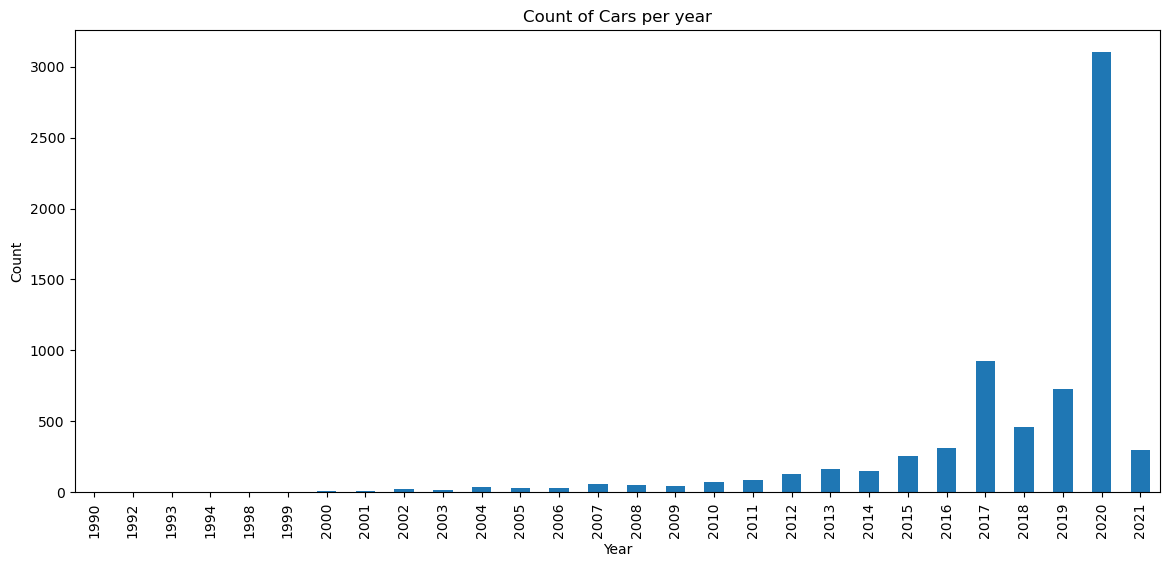

In [471]:
year_counts = df['year'].value_counts().sort_index() 

plt.figure(figsize=(14, 6))
year_counts.plot(kind='bar')
plt.title('Count of Cars per year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Based on the graph above, there is a higher frequency of more recently manufactured cars being listed compared to older ones. Additionally, considering the price distribution graph, most of these later-made vehicles are priced cheaper which indicates that the year of manufacture may affect the price of a car's value. Moreover, the substantial increase in number of cars listed in 2020 compared to other years suggests several possible reasons:

* There is a high demand for cars manufactured in 2020
* More people are trying to sell their car made in 2020
* There was a major increase in car manufacturing in 2020 with more vehicles being created. 

In [478]:
print(df['is_new'].value_counts())

is_new
False    3728
True     3272
Name: count, dtype: int64


The split between new and old cars is fairly close

Table listing all the features present in the dataset and their type

|Variable Kind|Number of Features|Feature Names|
| --- | --- | --- |
| Numeric | 18 |  `city_fuel_economy`, `daysonmarket`, `engine_displacement`, `highway_fuel_economy`, `horsepower`, `latitude`, `longitude`, `mileage`, `savings_amount`, `seller_rating`    |
| Nominal  | 16 | `vin`, `body_type`, `city`, `dealer_zip`, `engine_type`, `exterior_color`, `franchise_dealer` `fuel_type`, `interior_color`, `is_new`, `listing_color`, `make_name`, `model_name`, `transmission`, `transmission_display`, `wheel_system` |
| Date  | 16 | `listed_date`, `year` |
| Text  | 16 | `back_legroom`, `front_legroom`, `fuel_tank_volume`, `height`, `length`, `maximum_seating`, `wheelbase`, `width`, `power`, `torque` |

---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering
- In this task you need to follow a set of instructions/questions listed below.
- Make sure you explain each answer carefully both in Markdown text, as well as on your video.

**Total Marks: 12**

Student in charge of this task: `Tran Tuan Huy Bui`

In [484]:
class Cleaner:

    def __init__(self, df: pd.DataFrame):
        self.df = df.copy()


    def extract_numerical_values(self, features: list):
        for feature in features:
            self.df[feature] = self.df[feature].str.split().str[0]
            self.df[feature] = pd.to_numeric(self.df[feature], errors='coerce')
        #return self.df


    def extract_multiple_numerical_values(self, feature:str, value1:str, value2:str):
        '''
        Extracts two numerical values from a torque and power
        '''

        self.df[value1] = self.df[feature].str.extract(r'(\d+)', expand=False)\
                                        .apply(pd.to_numeric, errors='coerce')
                                        
        self.df[value2] = self.df[feature].str.extract(r'@\s*(\d+,?\d*)', expand=False)
        self.df[value2] = self.df[value2].str.replace(r',', '', regex=True)\
                                        .apply(pd.to_numeric, errors='coerce')

        del self.df[feature]


    def impute_numerical_columns(self, numerical_cols:list):
        self.df[numerical_cols] = self.df.loc[:, numerical_cols] \
                                    .fillna(self.df[numerical_cols].mean(axis=0))        


    def impute_categorical_columns(self, categorical_cols:list):
        self.df[categorical_cols] = self.df.loc[:, categorical_cols] \
                                    .fillna(self.df[categorical_cols].mode(axis=0).iloc[0])

train_cleaner = Cleaner(df)
test_cleaner = Cleaner(df_test)

**Task 2, Question 1**: Clean **all** numerical features so that they can be used in training algorithms. For instance, back_legroom feature is in object format containing both numerical values and text. Extract numerical values (equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [487]:
num_one_item_col = ['back_legroom','front_legroom', 
                  'fuel_tank_volume', 'height', 'length', 
                  'maximum_seating', 'wheelbase', 'width']
                  

In [489]:
train_cleaner.extract_numerical_values(num_one_item_col)


In [491]:
def categorise(X):
    num_feat = X.select_dtypes(include=['int64', 'float64'])
    cat_feat = X.select_dtypes(include=['object', 'bool'])
    
    # Impute missing values for numeric features with the mean
    for feat in num_feat:
        X[feat] = X[feat].fillna(X[feat].mean())
    
    # Impute missing values for categorical features with the mode
    for feat in cat_feat:
        cat_mode = X[feat].mode()[0]
        X[feat] = X[feat].fillna(cat_mode)
        
        # if feat == bool:
        #     df[feat] = df[feat].astype('object')    
            
    return num_feat, cat_feat, X

`(Task 2, Question 1 Text Here - insert more cells as required)`

**Task 2, Question 2** Create at least 5 new features from the existing numerical variables which contain multiple items of information, for example you could extract maximum torque and torque rpm from the torque variable.  
(2 marks)

In [495]:
train_cleaner.extract_multiple_numerical_values('torque', 'max_torque', 'torque_rpm')
train_cleaner.extract_multiple_numerical_values('power', 'max_power', 'power_rpm')

# extract listed year from listed date
train_cleaner.df['listed_year'] = pd.to_datetime(train_cleaner.df['listed_date']).dt.year

`(Task 2, Question 2 Text Here - insert more cells as required)`

**Task 2, Question 3**: Impute the missing values for all features in both the training and test datasets.   
(3 marks)

In [499]:
## Task 2, Question 3 Code Here

In [501]:
numerical_cols = ['back_legroom', 'city_fuel_economy', 'daysonmarket', 'engine_displacement', 
                  'front_legroom', 'fuel_tank_volume', 'height', 'highway_fuel_economy', 'horsepower', 
                  'latitude', 'longitude', 'length', 'maximum_seating', 'mileage', 'savings_amount', 
                  'seller_rating', 'max_torque', 'torque_rpm', 'max_power', 'power_rpm', 'wheelbase', 'width']

train_cleaner.impute_numerical_columns(numerical_cols)

In [503]:
categorical_cols = ['body_type', 'city', 'dealer_zip', 'engine_type', 'exterior_color', 'franchise_dealer', 'fuel_type',
                    'interior_color', 'is_new', 'listing_color', 'make_name', 'model_name', 'transmission', 'transmission_display', 'wheel_system']

train_cleaner.impute_categorical_columns(categorical_cols)

`(Task 2, Question 3 Text Here - insert more cells as required)`

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 

- Where multiple values are given for an observation encode the observation as 'other'. 
- Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately. For instance, map colours into 5 basic colours + 'other': [red, yellow, green, blue, purple, other] and then encode.  
(2 marks)

In [356]:
## Task 2, Question 4 Code Here

In [358]:
def encode_multiple_values(df, column):
    """
    Encodes observations with multiple values for a column as 'other'
    """
    # Create a boolean mask for rows with multiple values
    multi_value_mask = df[column].apply(lambda x: isinstance(x, list) or isinstance(x, set))
    
    # Replace multiple values with 'other'
    df.loc[multi_value_mask, column] = 'other'
    
    return df

In [536]:
train_cleaner.df.head()
# train_cleaner.df.info()

# Create a copy
df_encode = train_cleaner.df.copy()
# df_encode.head()

In [628]:
def most_frequent(df, feature, n):
    # Create a dataframe to check the most frequent values of each categorical feature
    # Create a list of values for the single column
    values = [1, 2, 3, 4, 5]

    # Create the DataFrame with a single column
    most_fq_df = pd.DataFrame({'Column1': values})

    for feat in feature:
        value_counts = df[feat].value_counts().head(n)

        top_values_df = value_counts.reset_index()

        del top_values_df['count']

        most_fq_df = pd.concat([most_fq_df, top_values_df], axis=1)

    del most_fq_df['Column1']

    return most_fq_df

In [630]:
# Define the list of colors
color = ['black', 'white', 'gray', 'silver', 'red', 'yellow', 'green', 'blue', 'purple', 'other']

# Convert the list of colors to a set for faster lookup
color_set = set(color)

# Create a function to check if any word in the observation matches a color
def match_color(observation):
    # Convert the observation to lowercase for case-insensitive matching
    observation = str(observation).lower()
    
    # Check if any word in the observation matches a color
    for word in observation.split():
        if word in color_set:
            return word
    
    # If no match is found, return 'other'
    return 'other'

In [596]:
allCatMostFrequent_df = most_frequent(df_encode, categorical_cols, 5)
allCatMostFrequent_df

,body_type,city,dealer_zip,engine_type,exterior_color,franchise_dealer,fuel_type,interior_color,is_new,listing_color,make_name,model_name,transmission,transmission_display,wheel_system
0,SUV / Crossover,Houston,77477,I4,Black,True,Gasoline,Black,False,WHITE,Ford,F-150,A,Automatic,FWD
1,Sedan,Miami,33619,V6,White,False,Flex Fuel Vehicle,Gray,True,BLACK,Chevrolet,Silverado 1500,CVT,Continuously Variable Transmission,AWD
2,Pickup Truck,Columbus,43228,V8,Gray,NaN,Diesel,Jet Black,NaN,GRAY,Nissan,1500,M,6-Speed Automatic,4WD
3,Minivan,San Antonio,32505,V6 Flex Fuel Vehicle,Summit White,NaN,Biodiesel,Black (Charcoal),NaN,UNKNOWN,Honda,Rogue,Dual Clutch,8-Speed Automatic,RWD
4,Coupe,Tampa,85297,H4,Silver,NaN,Hybrid,Black (Ebony),NaN,SILVER,Jeep,CR-V,NaN,9-Speed Automatic,4X2


In [632]:
colorFeat = ['exterior_color', 'interior_color', 'listing_color']
df_color = df_encode[colorFeat].copy()

# Apply the match_color function to the 'df_color'
for feat in colorFeat:
    df_color[f'matched_color_{feat}'] = df_encode[feat].apply(match_color)
    
# df_color.head()

matchedColorFeat = ['matched_color_exterior_color', 'matched_color_interior_color', 'matched_color_listing_color']
allColorFeatMostFrequent_df = most_frequent(df_color, matchedColorFeat, 100)

allColorFeatMostFrequent_df

,matched_color_exterior_color,matched_color_interior_color,matched_color_listing_color
0,white,black,white
1,black,other,black
2,other,gray,other
3,silver,white,gray
4,red,red,silver
5,blue,blue,red
6,gray,silver,blue
7,green,yellow,green
8,yellow,NaN,yellow
9,purple,NaN,purple


In [362]:
# for feat in categorical_cols:
#     encode_multiple_values(df_encode, feat)
    
#     # Convert the column to string before using str accessor
#     df_encode[feat] = df_encode[feat].astype(str)
    
    
#     other_count = df[feat].str.contains('other').sum()
#     print(f"Number of observations {feat} encoded as 'other': {other_count}")


`(Task 2, Question 4 Text Here - insert more cells as required)`

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

In [ ]:
## Task 2, Question 5 Code Here

`(Task 2, Question 5 Text Here - insert more cells as required)`

**Task 2, Question 6**: Perform some EDA to measure the relationship between the features and the target and carefully explain your findings. 
(2 marks)

In [ ]:
## Task 2, Question 6 Code Here

`(Task 2, Question 6 Text Here - insert more cells as required)`

--- 
## Task 3: Fit and tune a forecasting model, submit predictions & win competition

Make sure you **clearly explain each step** you do both in Markdown and on the recoded video.   
*In this task you must not create any additional features and should only relly on the datasets constructed in Task 2.*

1. Build and explain at least 3 machine learning (ML) regression models taking into account the outcomes of Tasks 1 & 2 (3 marks)    
2. Fit the models and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly (3 marks)   
3. Select your best algorithm, create predictions using the test dataset, and submit your predictions on Kaggle's competition page. Make sure you explain all the steps that led you to chose this algorithm both in the video presentation and in your written answer. (4 marks)   
4. Provide Kaggle ranking and score (screenshot your final submission) and comment (e.g. how could you improve your ranking?) (2 mark)   

- Hints:
    - To perform well you will need to iterate Tasks 2 and Task 3
    - Make sure your Python code works, so that a marker that can replicate your Kaggle submission and score.
    - You will receive the mark of zero if your code does not produce the forecasts uploaded to Kaggle 

**Total Marks: 12**

Student in charge of this task: `Chau Anh Cong`

In [ ]:
y = df_train['price']
X = df_train[['year', 'daysonmarket']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)


# Submission

In [ ]:
test_cleaner = Cleaner(df_test)

test_cleaner.extract_numerical_values(['back_legroom', 'front_legroom', 'fuel_tank_volume', 'height',
                                        'length', 'maximum_seating', 'wheelbase', 'width'])

test

In [ ]:
output = pd.DataFrame({"vin": df_test['vin'].values, "price": lr.predict(df_test[['year', 'daysonmarket']])})
output

`(Task 3 - insert more cells as required)`

In [ ]:
output.to_csv('output.csv', index=False)

---
---
## Marking Criteria

To receive full marks your solutions must satisfy the following criteria:

- Problem Description: 12 marks
- Data Cleaning: 12 marks
- Building Forecasting models: 12 marks
- Competition Points: 4 marks
- Forecasts correctly uploaded to Kaggle
- Python code is clean and concise
- Written explanations are provided in clear and easy to understand sentences
- Video presentations are limited to 15 minutes in duration
- Each team member delivers a 5-minute presentation on their assigned task
    - During the video recording, make sure that both your face and Jupyter Notebook are clearly visible
    - Your code must be readable on the video
    - Discuss both the actions you took and, more importantly, the reasoning behind these actions, explaining the significance of key steps
- The assignment notebook is well-organised and easy to follow
- Failure to meet the above marking criteria will result in a deduction of marks

---
---